In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [25]:

def sigmoid(x): 
    with np.errstate(over='ignore'):
        return  1/(1+np.exp(-x))
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)
            
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self,X):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)
            return np.array([0 if y <=0.5 else 1 for y in predictions])
                

In [30]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split

cancer = datasets.load_breast_cancer()
X = cancer['data'][:, :2] # Only take the first two features for visualization 
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [31]:
clf = LogisticRegression(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [32]:
acc= np.sum(y_pred==y_test)/len(y_test)
acc

0.7280701754385965

In [35]:
sns.set()

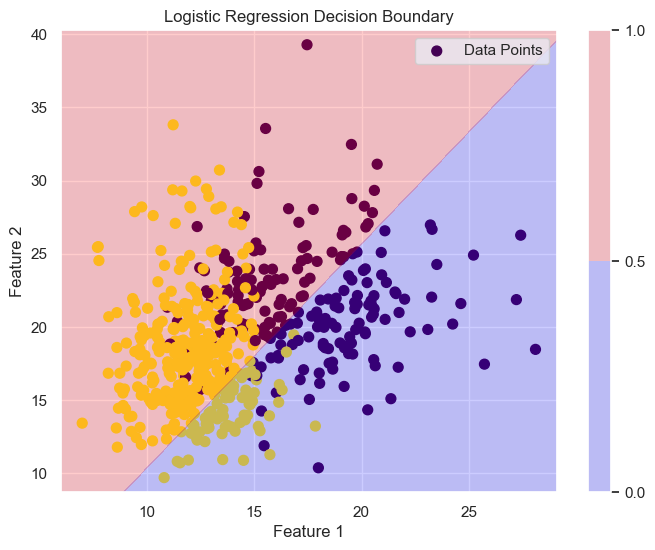

In [36]:
fig = plt.figure(figsize=(8, 6)) 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, label='Data Points') 
# Create a mesh to plot the decision boundary 
x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.01), 
                       np.arange(x1_min, x1_max, 0.01)) 
grid = np.c_[xx0.ravel(), xx1.ravel()] 
probs = sigmoid(np.dot(grid, clf.weights) + clf.bias).reshape(xx0.shape) 
plt.contourf(xx0, xx1, probs, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red']) 
plt.colorbar() 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Logistic Regression Decision Boundary') 
plt.legend() 
plt.show()